In [1]:
import pandas as pd

data = pd.read_csv('online_adapt.csv')

# Encode `Age` to integers, 1, 2, 3, 4, 5, 6.
age_mapper = {'26-30':6, '21-25':5, '16-20':4, '11-15':3, '6-10':2, '1-5':1}
age_t = data['Age'].replace(age_mapper)

# Encode `Network Type` to integers, 2, 3, 4.
net_mapper = {'2G':2, '3G':3, '4G':4}
net_t = data['Network Type'].replace(net_mapper)

# Encode `Class Duration` to integers, 0, 1, 2.
class_mapper = {'0':0, '1-3':1, '3-6':2}
class_t = data['Class Duration'].replace(class_mapper)

# Replace `Age`, `Network Type`, `Class Duration` by their corresponding numeric versions.
data['Age'] = age_t
data['Network Type'] = net_t
data['Class Duration'] = class_t

In [2]:
# One-hot encode the rest of the variables except for the response variable, `Adaptivity Level`.

y = data['Adaptivity Level']
data1 = pd.get_dummies(data.drop('Adaptivity Level', axis=1))
data1.head(2)

,Age,Network Type,Class Duration,Gender_Boy,Gender_Girl,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,...,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,5,4,2,1,0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
1,5,4,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0


In [3]:
data1.shape

(1205, 26)

In [4]:
y.value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1205 non-null   int64
 1   Network Type                     1205 non-null   int64
 2   Class Duration                   1205 non-null   int64
 3   Gender_Boy                       1205 non-null   uint8
 4   Gender_Girl                      1205 non-null   uint8
 5   Education Level_College          1205 non-null   uint8
 6   Education Level_School           1205 non-null   uint8
 7   Education Level_University       1205 non-null   uint8
 8   Institution Type_Government      1205 non-null   uint8
 9   Institution Type_Non Government  1205 non-null   uint8
 10  IT Student_No                    1205 non-null   uint8
 11  IT Student_Yes                   1205 non-null   uint8
 12  Location_No                      1205 non-null  

In [6]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data1, y, random_state=0, stratify=y)

# Standardize features
scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Create support vector classifier
svc = LinearSVC(C=1.0, max_iter=4000)

# Train model
model = svc.fit(X_train_std, y_train)

In [8]:
model.score(X_test_std, y_test)

0.6788079470198676

In [9]:
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='rbf', C=1000, gamma='scale')

In [10]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print('Accuracy : ' + str(score))

Accuracy : 0.9072847682119205


In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=25, whiten=True, 
          svd_solver='randomized',random_state=0)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


param_grid = {'svc__C': [0.1, 1.0, 5.0, 10.0, 50.0],'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001]}



grid = GridSearchCV(model, param_grid, cv=5, refit=True)
%time grid.fit(X_train, y_train)

Wall time: 12.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=25, random_state=0,
                                            svd_solver='randomized',
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1.0, 5.0, 10.0, 50.0],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [12]:
print(grid.best_params_)

{'svc__C': 10.0, 'svc__gamma': 0.1}


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import numpy as np

normalizer = Normalizer()

# Standardize features
X_norm = normalizer.fit_transform(data1)


# Split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25,
                                                    random_state=100, stratify=y)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[50], max_iter=np.inf).fit(X_train, y_train)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9172185430463576

In [14]:
mlp2 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[50, 10], max_iter=np.inf)
mlp2.fit(X_train, y_train)
mlp2.score(X_test, y_test)

0.8410596026490066

In [25]:
for alpha in np.linspace(0.001, 0.011, 10):
    mlp3 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[50, 50], alpha=alpha, max_iter=np.inf)
    mlp3.fit(X_train, y_train)
    print(mlp3.score(X_test, y_test))

0.9105960264900662
0.9238410596026491
0.9139072847682119
0.9205298013245033
0.9172185430463576
0.9139072847682119
0.9172185430463576
0.9105960264900662
0.9205298013245033
0.9271523178807947


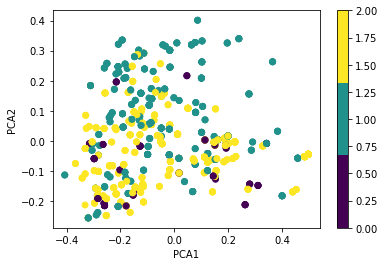

In [32]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

encoder = OrdinalEncoder()
y= y.reshape(-1, 1)
result = encoder.fit_transform(y)


# Standardize features
data_std = normalizer.fit_transform(data1)
model = PCA(n_components=2)      
model.fit(data_std)               
X_2D = model.transform(data_std)   

PCA1 = X_2D[:,0]; PCA2 = X_2D[:,1]
plt.scatter(PCA1, PCA2, c=result, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()

In [46]:
from sklearn.cluster import KMeans

model = PCA(n_components=2)     
model.fit(data_std)                
# build the clustering model
kmeans = KMeans(n_clusters=3)    ]
kmeans.fit(X_2D)

KMeans(n_clusters=3)

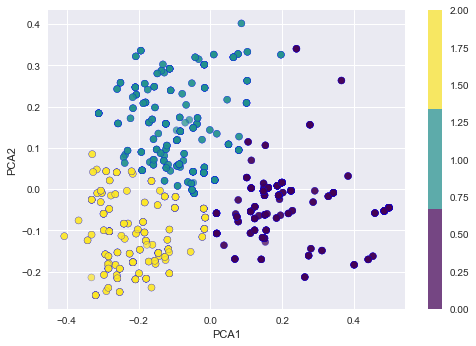

In [56]:
plt.style.use('seaborn')


y_pred = kmeans.predict(X_2D)
PCA1 = X_2D[:,0]; PCA2 = X_2D[:,1]

markers=['o']

plt.scatter(PCA1, PCA2, c=y_pred,
            alpha=0.7, edgecolor='blue',
            cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()